In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

<Figure size 432x288 with 0 Axes>

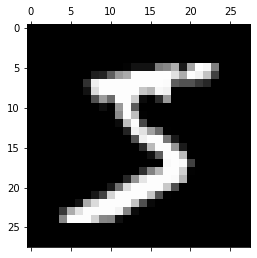

5


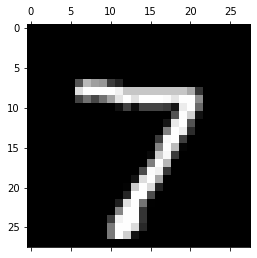

7


In [32]:
i = 0

plt.gray() 
plt.matshow(X_train[i]) 
plt.show()
print(y_train[i])

plt.matshow(X_test[i]) 
plt.show()
print(y_test[i])

In [33]:
print('X_train: ' ,(X_train.shape))
print('Y_train: ' ,(y_train.shape))
print('X_test:  ' ,(X_train.shape))
print('Y_test:  ' ,(y_test.shape))

# Train: 60000 images, 28*28 images
# Test:  10000 images, 28*28 images

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (60000, 28, 28)
Y_test:   (10000,)


In [34]:
# Train samples 
n = X_train.shape[0]
# Features(m)
features = X_train.shape[1]**2

# Test samples
n_test = X_test.shape[0]

# Training each number with :
tests_per_digit = 5000

print(n,features,n_test)

y_train = y_train.reshape(n,1) 
y_test = y_test.reshape(n_test,1) 


60000 784 10000


## prediction = theta0 + theta1*w
We can do 
prediction = theta0 + theta1 * w

    n*1             n*1     n*m    m*1


OR


prediction = theta   *   w

    n*1      n*(m+1)   (m+1)*1


We modify theta(features wala) to one extra column of 1's(to compensate for theta0) and 
we modify w with an extra row to match the correct size 

In [35]:
# Reshape to (n,features)
print(X_train.shape)
X_train = X_train.reshape(n,features)
X_test = X_test.reshape(n_test,features)

# New "augmented" array with (X_train,y_train)
appended_version = np.append(X_train,y_train,axis = 1)
print(appended_version.shape)
# n,785

X_train = np.c_[X_train, np.ones((n,1))]
X_test = np.c_[X_test, np.ones((n_test,1))]

(60000, 28, 28)
(60000, 785)


In [36]:
def sigmoid(Z):
    sig = 1/(1+np.exp(-Z))
    return(sig)

In [37]:
def reLU(z):
    rel = np.maximum(0,z)
    return rel

In [38]:
# def segregate1(digit):
#     y_digit = np.zeros((n,1))
#     row = (y_train == digit )
#     y_digit[row] = 1
    
#     return(y_digit)


In [39]:
def segregate2(digit):
    # Initialze
    X_digit = np.array([])
    y_digit = np.array([])
    augmented_array = np.array([])

    # index of numbers that are and aren't "digit"
    index1 = (np.where(appended_version[:,784] == digit)[0])[:tests_per_digit]
    index2 = (np.where(appended_version[:,784] != digit)[0])[:tests_per_digit]

    # Putting it all in array
    augmented_array = np.concatenate((appended_version[index1], appended_version[index2]),axis = 0)

    # shuffling before the segregation
    np.random.shuffle(augmented_array)
    
    # Segragating X_digit and y_digit from the augmented X_digit 
    y_digit = augmented_array[:,-1].reshape(2*tests_per_digit,1)
    X_digit = augmented_array[:,:-1]

    #  making the digit value to 1 and rest to 0
    y_digit = np.asarray([1 if val==digit else 0 for val in y_digit]).reshape(2*tests_per_digit,1)
    
    # Adding columns of 1's (The constant parameter calculation)
    X_digit = np.c_[X_digit, np.ones((2*tests_per_digit,1))]

    return(X_digit,y_digit)

    

In [49]:
def gradient_descent(iterations,X,y,weights,learning_rate):
    for i in range(iterations) :
        # hypothesis = reLU(np.dot(X,weights))
        hypothesis = sigmoid(np.dot(X,weights))
        # n,1                    n,m+1   m+1,1                  
        cost = -np.mean(y*hypothesis + (1-y)*(1-hypothesis))

        cost_diff = -np.mean(X*(y-hypothesis),axis = 0).reshape(features+1,1)# wrt weights (theta, cause that's the variable)
        # 785,1             n*785  n*1   

        weights = weights - learning_rate*(cost_diff)
        #785,1
        if i%500 == 0:
            print("Total_cost after",i,"iteration is: ",cost)
    return weights 

In [41]:
def prediction(X,y,weights,size,lr,iteration):   
    # size*785
    # predictions = reLU(np.dot(X,weights))
    predictions = sigmoid(np.dot(X,weights))
    # size*10                    size*785  785*10
    predictions = np.argmax(predictions,axis = 1).reshape(size,1)
    # size*1
    # print("X shape: ",X.shape,"Prediction shape: ",predictions.shape, "y shape",y.shape)
    accuracy = predictions == y
    print("Accuracy of model for",lr,"and iterations",iteration,"=" ,np.mean(accuracy)*100)
    return np.mean(accuracy)*100

In [48]:
iterations = [500]
learning_rates = [0.01]

iter = []
lr = []
accuracy_train = []
accuracy_test = []

for iteration in iterations :
    for learning_rate in learning_rates :
        final_weights = np.zeros((features+1,1))
        # current shape: 785,1
        # finally shape: 785,11
        for digit in range(10):

            # y_train_digit = segregate1(y_train, digit)
            X_train_digit, y_train_digit = segregate2(digit)
            
            # initializing random weights
            weights = np.random.randint(100,size=(features+1,1))*0.01
            # Shape m+1,1 : 785,1

            weights = gradient_descent(iteration,X_train_digit,y_train_digit,weights,learning_rate)

            final_weights = np.concatenate((final_weights,weights),axis=1)

        final_weights = final_weights[:,1:]
        iter.append(iteration)
        lr.append(learning_rate)
        accuracy_train.append(prediction(X_train,y_train,final_weights,n,learning_rate,iteration))
        accuracy_test.append(prediction(X_test,y_test,final_weights,n_test,learning_rate,iteration))

print("Done")

Total_cost after 0 iteration is:  -0.5


C:\Users\varun\AppData\Local\Temp/ipykernel_22576/3887217893.py:2: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-Z))


Total_cost after 0 iteration is:  -0.5
Total_cost after 0 iteration is:  -0.5
Total_cost after 0 iteration is:  -0.5
Total_cost after 0 iteration is:  -0.5
Total_cost after 0 iteration is:  -0.5
Total_cost after 0 iteration is:  -0.5
Total_cost after 0 iteration is:  -0.5
Total_cost after 0 iteration is:  -0.5
Total_cost after 0 iteration is:  -0.5
Accuracy of model for 0.01 and iterations 500 = 74.37
Accuracy of model for 0.01 and iterations 500 = 74.42999999999999
Done


[74.97666666666667]


C:\Users\varun\AppData\Local\Temp/ipykernel_22576/690071597.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


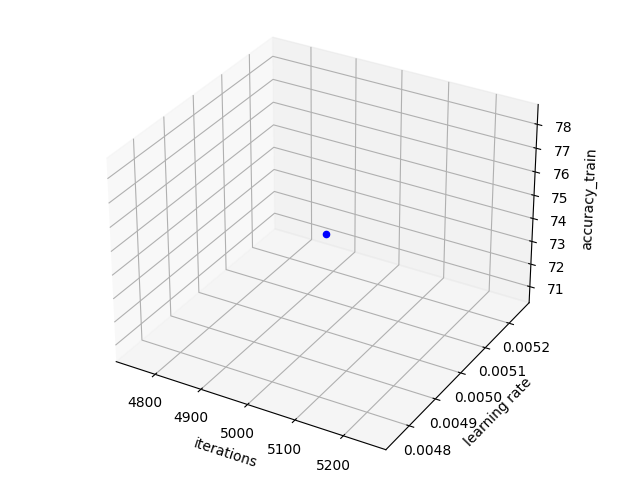

In [46]:
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
print(accuracy_train)

# creating the plot
plot_geeks = ax.scatter(iter, lr, accuracy_test, color='blue')
  
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('iterations')
ax.set_ylabel('learning rate')
ax.set_zlabel('accuracy_train')
  
# displaying the plot
plt.show()
